![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Round 7

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise.
Some approaches you can try in this exercise:

- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in rounds 2 to 7.

**Bonus**: Build a function, from round 2 and round 7, to clean and process the data.

### Explore the data

Done in the round 3.

### Modeling

Description:

- Try to improve the linear regression model.

01 - Problem (case study)

    Data Description.
    Goal.

Data description: The data belongs to a fund raising campaign from the non profit organization 'Healthcare for all'. Several information about 'lapsed donors' is stated.
Goal: Develop a regression model that maximizes the net revenue generated from future renewal mailings to Lapsed donors.

02 - Getting Data

    Read the .csv file.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
file = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
data_original = pd.DataFrame(file)
data = data_original.copy()
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.shape

(9134, 24)

03 - Cleaning/Wrangling/EDA

    Change headers names.
    Deal with NaN values.
    Categorical Features.
    Numerical Features.
    Exploration.

In [4]:
data.columns = data.columns.str.lower().str.replace(' ','_')

In [5]:
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)

In [6]:
# Let's take a look at the numericals' plots

In [7]:
X_num.shape

(9134, 8)

In [8]:
def plot_hist_grid(data,qx,qy):
    fig, axes = plt.subplots(qx,qy,figsize=(50,25))
    for count, val in enumerate(data):
        sns.distplot(data[val], ax=axes[math.floor(count/qy),count%qy], kde=True,
                    kde_kws={"color": "navy", "alpha":0.1, "linewidth": 5, "shade":True}
                    )
    plt.plot

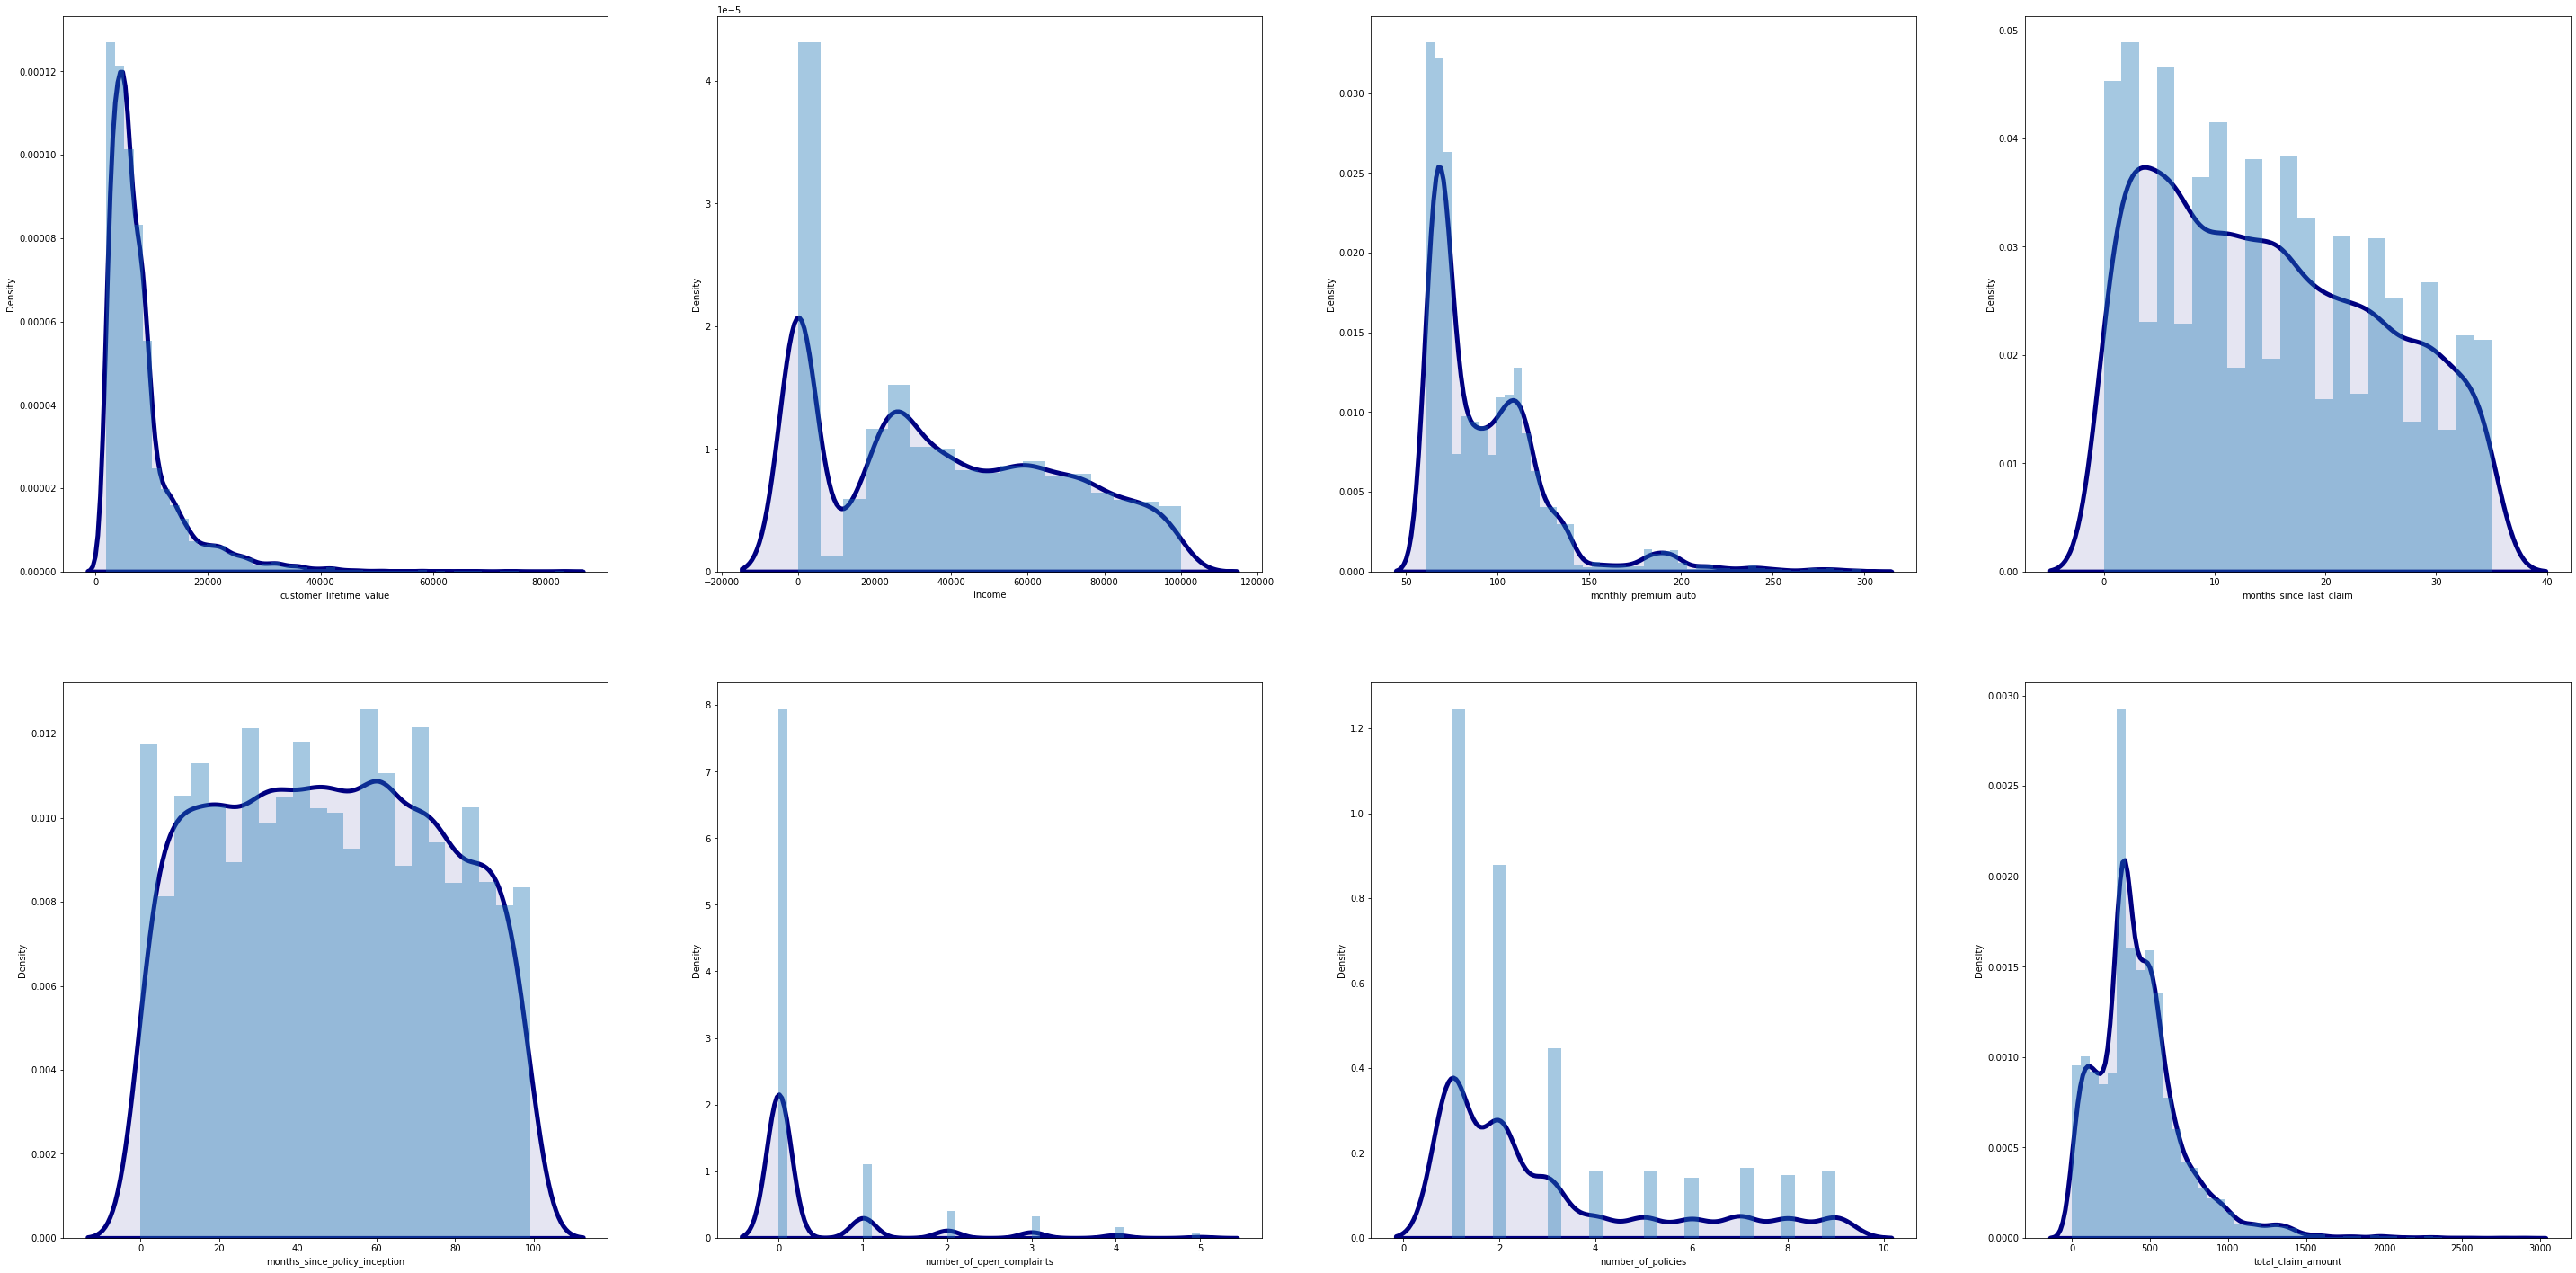

In [9]:
plot_hist_grid(X_num,2,4)    

In [10]:
def plot_box_grid(df,qx,qy):
    fig, axes = plt.subplots(qx,qy,figsize=(15,15))
    for count, val in enumerate(df):
        sns.boxplot(df[val], ax=axes[math.floor(count/qy),count%qy], color='aquamarine', linewidth=2)
    plt.plot

In [11]:
def plot_box_grid(df):
    fig = plt.figure(figsize=(15,15))
    axes = []
    for count, val in enumerate(df):
        axes.append(fig.add_subplot(math.ceil(df.shape[1]/3), 3, count+1))
        sns.boxplot(x=df[val], ax=axes[count], color='turquoise')
    plt.plot

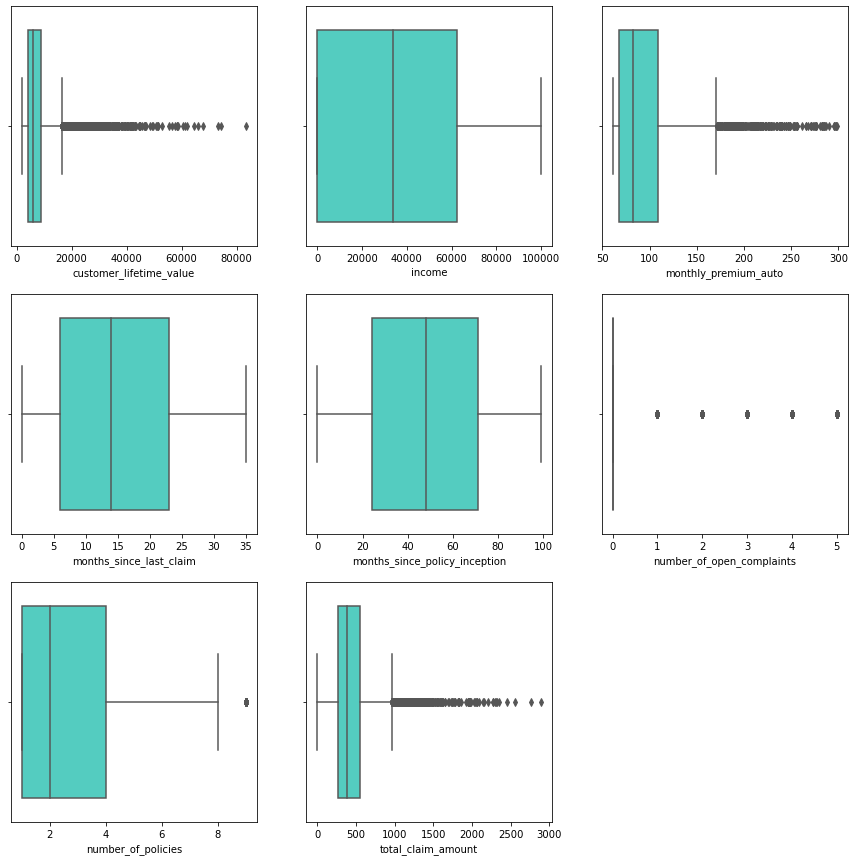

In [12]:
plot_box_grid(X_num)

In [13]:
def plot_heatmap(df, size):
    corr = df.corr().round(2)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask, k=1)] = True

    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(size, size))
        ax = sns.heatmap(corr, mask=mask, center=0, vmin=0, vmax=1, annot=True, square=True,
                         linewidths=1, annot_kws={'fontsize':'large'}, cmap='rocket',
                         cbar_kws={"orientation": "vertical", 'fraction': 0.03, 'label': 'Correlation'}
                        )

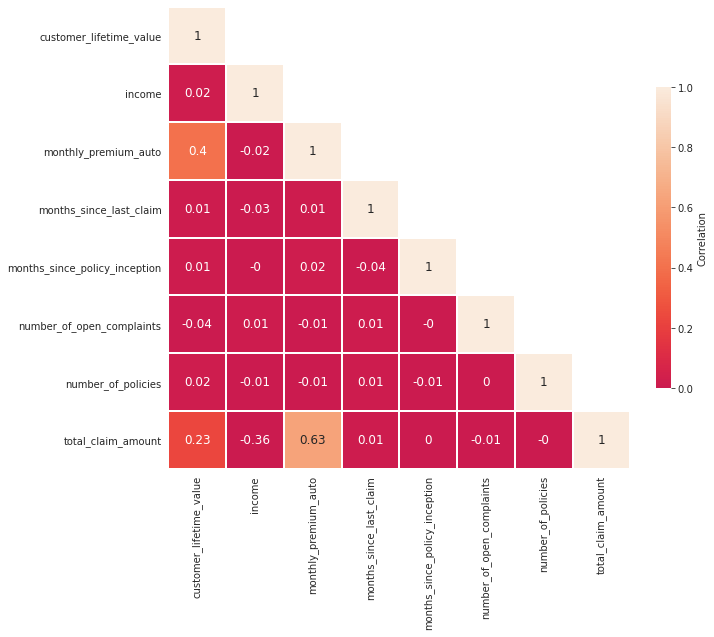

In [14]:
plot_heatmap(X_num, 9)

In [15]:
def plot_regplots(df, target):
    fig = plt.figure(figsize=(15,15))
    axes = []
    for count, val in enumerate(df):
        axes.append(fig.add_subplot(math.ceil(df.shape[1]/3), 3, count+1))
        sns.regplot(x=val, y=target, ax=axes[count], data=df,
                    color='darkolivegreen', line_kws={'color':'orangered'})
    plt.plot   

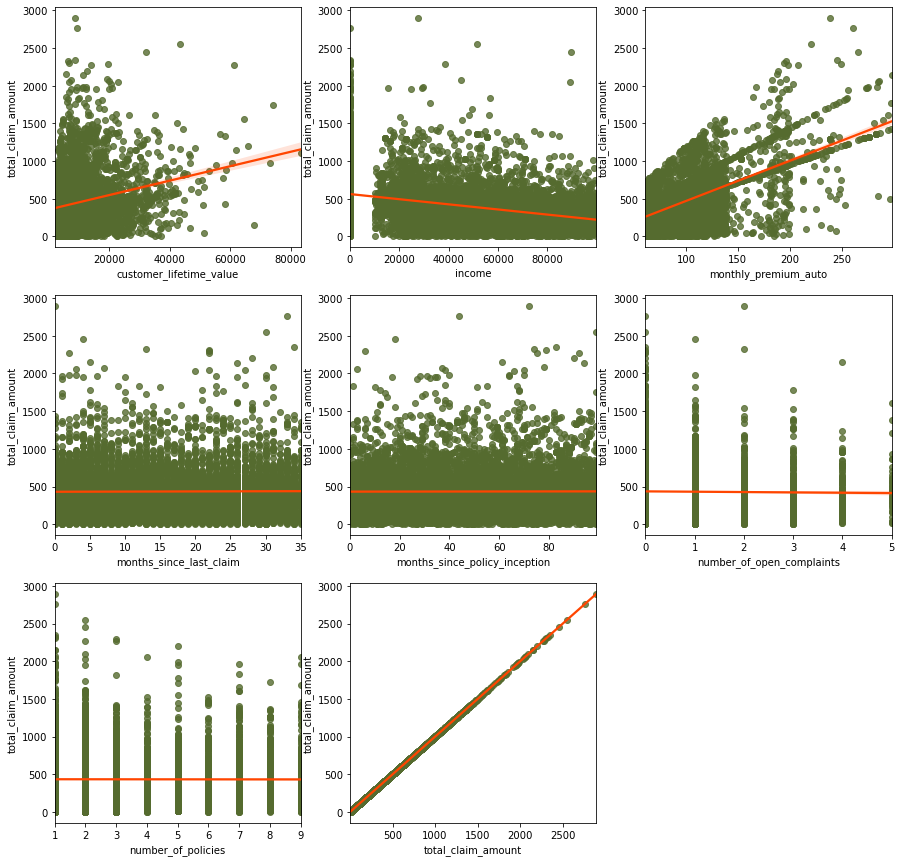

In [16]:
plot_regplots(X_num, "total_claim_amount")

In [17]:
# Drop the target as it isn't needed here
X_num = X_num.drop('total_claim_amount', axis=1)

04 - Processing Data

    Dealing with outliers.
    Normalization.
    Encoding Categorical Data.
    Splitting into train set and test set.

In [18]:
# Log transform function
def log_t(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later    

In [19]:
# Box Cox transform function
def box_cox_t(x):
    xt, lmbda = stats.boxcox(x)
    return xt

In [20]:
def plot_hs(df):
    fig, axs = plt.subplots(1, df.shape[1], sharey=False, figsize=(df.shape[1]*5,5))
    for count, val in enumerate(df):
        sns.distplot(df[val], ax=axs[count], kde=True,
                     kde_kws={"color": "navy", "alpha":1, "linewidth": 3, "shade":False}
                    )
    plt.plot

In [21]:
X_num['customer_lifetime_value_log'] = list(map(log_t, X_num['customer_lifetime_value']))
X_num['customer_lifetime_value_boxcox'] = list(box_cox_t(X_num['customer_lifetime_value']))

In [22]:
d1 = pd.DataFrame()
d1 = pd.concat([X_num['customer_lifetime_value'],
                X_num['customer_lifetime_value_log'],
                X_num['customer_lifetime_value_boxcox']], axis=1)

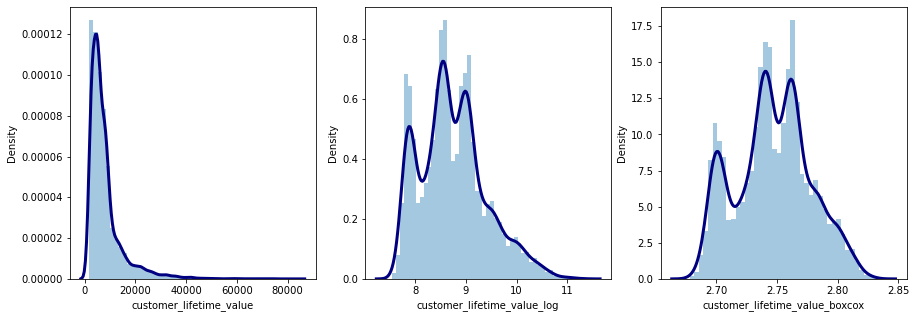

In [23]:
plot_hs(d1)

In [24]:
# cox-box looks better so we drop both original and log transform versions
X_num = X_num.drop('customer_lifetime_value', axis=1)
X_num = X_num.drop('customer_lifetime_value_log', axis=1)

In [25]:
# Now 'income'

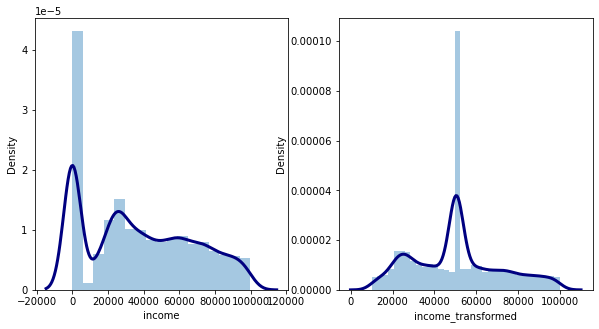

In [26]:
X_num['income_transformed'] = np.where(X_num['income']<=0, 0, data['income'])
# Now calculate mean of the new column, exluding zeros in the count 
mean = np.sum(X_num['income_transformed'])/len(X_num[X_num['income_transformed']>0])
# Replace all zeros for mean
X_num['income_transformed'] = X_num['income_transformed'].replace(0, mean)
plot_hs(pd.concat([X_num['income'], X_num['income_transformed']], axis=1))

In [27]:
X_num = X_num.drop('income', axis=1) 

In [28]:
# Now 'monthly_premium_auto'

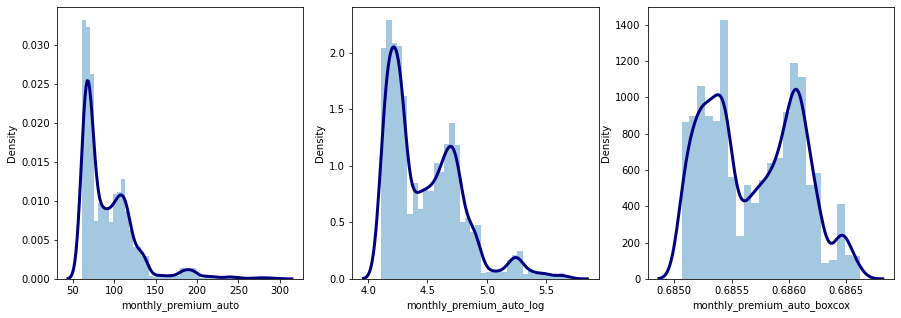

In [29]:
X_num['monthly_premium_auto_log'] = list(map(log_t, X_num['monthly_premium_auto']))
X_num['monthly_premium_auto_boxcox'] = list(box_cox_t(X_num['monthly_premium_auto']))
plot_hs(pd.concat([X_num['monthly_premium_auto'],
                   X_num['monthly_premium_auto_log'],
                   X_num['monthly_premium_auto_boxcox']], axis=1))

In [30]:
# box-cox looks better so we drop both original and log transform versions
X_num = X_num.drop('monthly_premium_auto', axis=1)
X_num = X_num.drop('monthly_premium_auto_log', axis=1)

In [31]:
X_num.head()

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value_boxcox,income_transformed,monthly_premium_auto_boxcox
0,32,5,0,1,2.703839,56274.000000,0.685347
1,13,42,0,8,2.754926,50456.580461,0.685871
2,18,38,0,2,2.780772,48767.000000,0.686039
3,18,65,0,7,2.759125,50456.580461,0.686018
4,12,44,0,1,2.704995,43836.000000,0.685461


In [32]:
X_num.shape

(9134, 7)

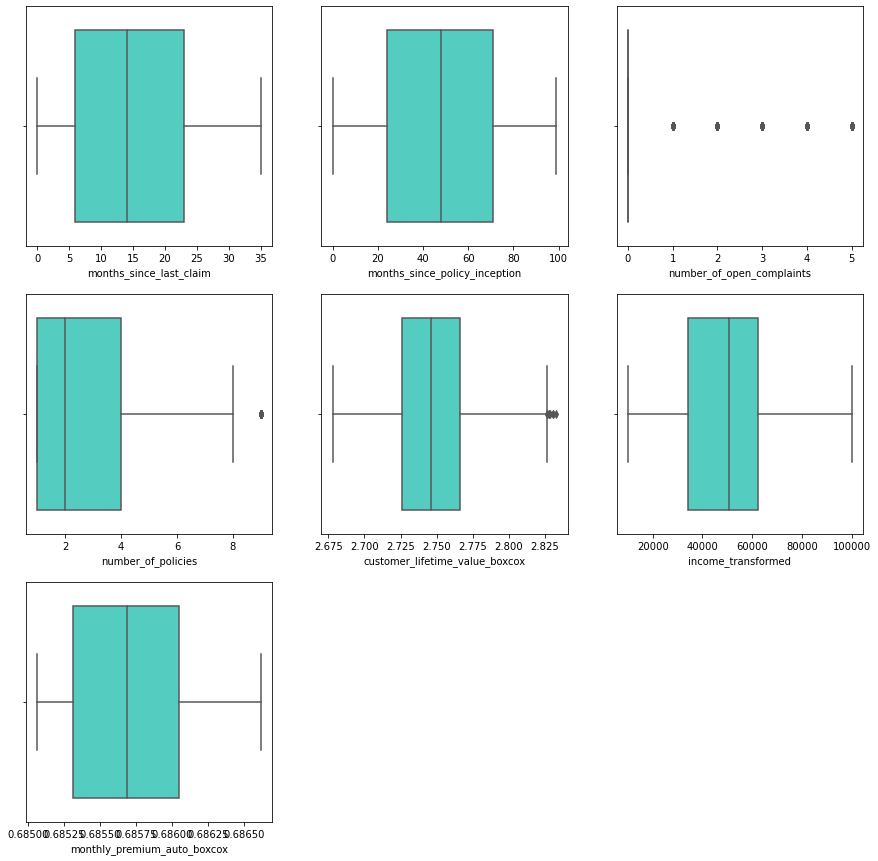

In [33]:
plot_box_grid(X_num)

In [34]:
# x-y split

In [35]:
Y = data['total_claim_amount']

In [36]:
# Normalization

In [37]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_num)
X_normalized = transformer.transform(X_num)
pd.DataFrame(X_normalized)

,0,1,2,3,4,5,6
0,0.000569,0.000089,0.000000,0.000018,0.000048,1.000000,0.000012
1,0.000258,0.000832,0.000000,0.000159,0.000055,1.000000,0.000014
2,0.000369,0.000779,0.000000,0.000041,0.000057,1.000000,0.000014
3,0.000357,0.001288,0.000000,0.000139,0.000055,0.999999,0.000014
4,0.000274,0.001004,0.000000,0.000023,0.000062,0.999999,0.000016
...,...,...,...,...,...,...,...
9129,0.000250,0.001237,0.000000,0.000028,0.000039,0.999999,0.000010
9130,0.000648,0.001296,0.000000,0.000046,0.000125,0.999999,0.000032
9131,0.000178,0.000733,0.000059,0.000040,0.000055,1.000000,0.000014
9132,0.001550,0.000137,0.000000,0.000137,0.000126,0.999999,0.000031


In [38]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_num)
X_standardized = transformer.transform(X_num)
pd.DataFrame(X_standardized)

,0,1,2,3,4,5,6
0,1.678099,-1.543287,-0.422250,-0.822648,-1.394949,2.770661e-01,-0.850611
1,-0.208186,-0.217334,-0.422250,2.106160,0.271652,3.465318e-16,0.433574
2,0.288205,-0.360680,-0.422250,-0.404247,1.114826,-8.046961e-02,0.846936
3,0.288205,0.606907,-0.422250,1.687759,0.408616,3.465318e-16,0.796030
4,-0.307465,-0.145661,-0.422250,-0.822648,-1.357236,-3.153182e-01,-0.571535
...,...,...,...,...,...,...,...
9129,0.288205,1.466984,-0.422250,-0.404247,1.780241,1.023238e+00,-0.571535
9130,-0.108908,-0.719046,-0.422250,-0.822648,-1.160385,-1.374161e+00,-0.216971
9131,-0.605299,-0.396517,2.873245,-0.404247,0.504451,3.465318e-16,0.077139
9132,1.876656,-1.614960,-0.422250,0.014154,0.384882,-1.358111e+00,0.501756


Dealing with categoricals

In [39]:
X_cat = data.select_dtypes(include = ('object', 'datetime'))
X_cat.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [40]:
X_cat = X_cat.drop('customer', axis=1)

In [41]:
X_cat['effective_to_date'] = pd.to_datetime(X_cat['effective_to_date'], errors = 'coerce')

In [42]:
# One Hot/Label Encoding (categorical)

In [43]:
X_cat.shape

(9134, 15)

In [44]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
X_encoded = encoder.transform(X_cat).toarray()
pd.DataFrame(X_encoded)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
X = np.concatenate((X_normalized, X_encoded), axis=1)

In [46]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,0.000569,0.000089,0.0,0.000018,0.000048,1.000000,0.000012,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.000258,0.000832,0.0,0.000159,0.000055,1.000000,0.000014,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000369,0.000779,0.0,0.000041,0.000057,1.000000,0.000014,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.000357,0.001288,0.0,0.000139,0.000055,0.999999,0.000014,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.000274,0.001004,0.0,0.000023,0.000062,0.999999,0.000016,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
# Splitting into train set and test set.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

05 - Modeling

    Apply model.

In [49]:
from sklearn import linear_model

In [50]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.756843754752728

06 - Model Validation

    R2.
    MSE.
    RMSE.
    MAE.

In [51]:
r2 = r2_score(y_test, predictions)
r2

0.756843754752728

In [52]:
mse = mean_squared_error(y_test, predictions)
print(mse)

19319.47025644642


In [53]:
rmse = math.sqrt(mse)
print(rmse)

138.99449721642372


In [54]:
n = len(X_test) 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.7494358917099339